# 4-2 グラフ描画の基礎

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [24]:
import os

#カレントディレクトリを指定
path = 'D:\\Python\\PythonユーザのためのJupyter入門'
os.chdir(path)

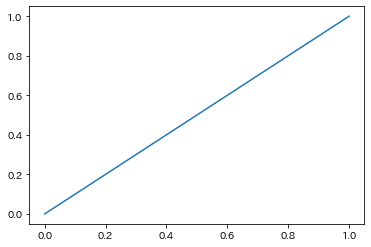

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111)

dat = [0,1]
ax.plot(dat)

plt.show()

### フィギュアとサブプロット
- フィギュアオブジェクトとサブプロットを生成する必要がある
- フィギュアはサブプロットを描画する領域、サブプロットはグラフを描画するための領域

## add_subplot()メソッドでサブプロットを配置する

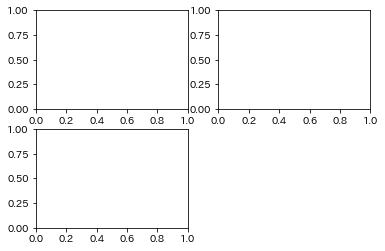

In [3]:
# フィギュアの作成
fig = plt.figure()

# フィギュア内にサブプロットを３つ配置
ax1 = fig.add_subplot(221) # 2行2列の1番
ax2 = fig.add_subplot(222) # 2行2列の2番
ax3 = fig.add_subplot(223) # 2行2列の3番

plt.show()

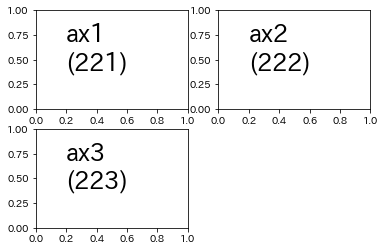

In [7]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

#番号記述
for i,ax in enumerate([ax1,ax2,ax3], start=1):
    txt = 'ax{0}\n(22{0})'.format(i)
    ax.text(0.2,0.4, txt, fontsize=24)
    
plt.show()    
    

In [ ]:
# add_subplot()メソッドによるサブプロットのカンマ区切り法
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

## subplots()関数を利用してサブプロットを配置する
- pyplot.subplots()関数を用いてフィギュア生成とサブプロットの配置を同時に行う

<class 'numpy.ndarray'> [[<matplotlib.axes._subplots.AxesSubplot object at 0x000002599A29A788>


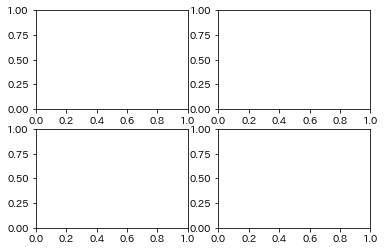

In [9]:
fig, axes = plt.subplots(2,2)

print(type(axes), axes)
plt.show()

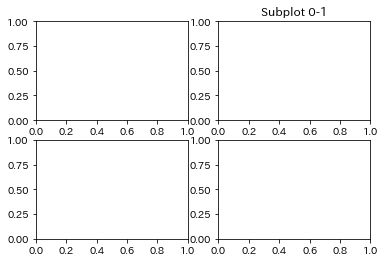

In [11]:
# 1行2列目のサブプロットにサブプロットタイトルを指定
fig, axes = plt.subplots(2,2)
axes[0,1].set_title('Subplot 0-1')
plt.show()

### スタイルを適用する

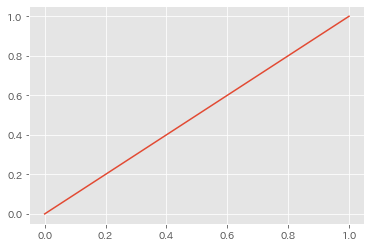

In [12]:
# スタイルの適用
plt.style.use('ggplot')
fig = plt.figure()
ax = fig.add_subplot(111)

dat = [0,1]
ax.plot(dat)
plt.show()

## 4-3 折れ線グラフ
- Axes.plot()メソッドで描画
- 引数が１つの場合与えれれた引数はY値として設定され、X値は自動的に最小値0、最大値：リストの要素-1の整数列が指定される
- リスト、タプル、numpy.ndarry, panads Seriesのデータ型が渡せる

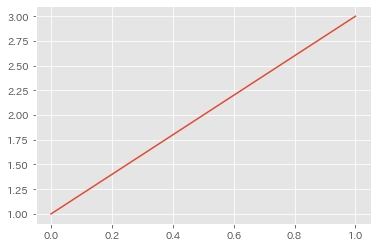

In [14]:
plt.style.use('ggplot')

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot([1,3])
plt.show()

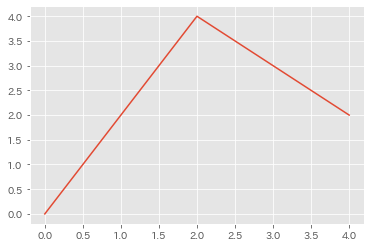

In [15]:
# X値とY値を指定した折れ線グラフ

fig= plt.figure()
ax = fig.add_subplot(111)

x=[0,2,4]
y=[0,4,2]

ax.plot(x,y)
plt.show()

- plot()メソッドを複数回実行することで１つのサブプロットに複数のグラフを重ね書きできる

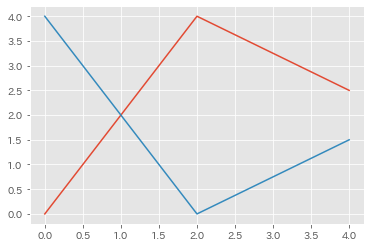

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = [0,2,4]
y1 = [0, 4, 2.5]
y2 = [4, 0, 1.5]

# 2本の線を描画
ax.plot(x,y1)
ax.plot(x,y2)

plt.show()



## 折れ線グラフを活用する

In [18]:
anime_stock_returns_csv = 'anime/anime_stock_returns.csv'
df = pd.read_csv(anime_stock_returns_csv, index_col=0, parse_dates=['Date'])
df.head()

,TOEI ANIMATION,IG Port
Date,,
2015-01-01,1.000000,1.000000
2015-01-02,1.000000,1.000000
2015-01-05,1.011695,1.014082
2015-01-06,1.001463,1.000000
2015-01-07,0.982457,1.000824


C:\Users\mikam\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


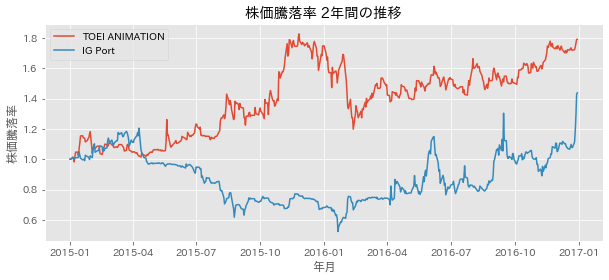

In [19]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)

# データと凡例を指定
ax.plot(df.index, df['TOEI ANIMATION'], label='TOEI ANIMATION')
ax.plot(df.index, df['IG Port'], label='IG Port')

# タイトル、軸ラベルを指定
ax.set_title('株価騰落率 2年間の推移')
ax.set_ylabel('株価騰落率')
ax.set_xlabel('年月')

# 凡例を有効化
ax.legend()

plt.show()

## 2軸をもつグラフを描画する
- X軸を共有して２つのY軸を持つ場合はAxes.twinx()
- Y軸を共有して2つのX軸をもつ場合はtwiny()

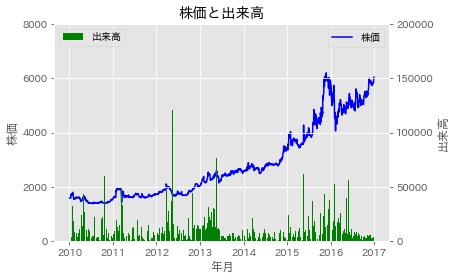

In [21]:
t4816_csv = 'anime/4816.csv'
df = pd.read_csv(t4816_csv, index_col=0, parse_dates=['Date'])

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(df.index, df['Close'], color='b', label='株価')

# X軸を共有しY軸を２つ使用する設定
ax2 = ax1.twinx()
ax2.bar(df.index, df['Volume'], color='g', label='出来高', width=2)

# 軸と軸ラベルの設定
ax1.set_yticks([i *2000 for i in range(5)])
ax1.set_ylabel('株価')
ax2.set_yticks([i * 50000 for i in range(5)])
ax2.set_ylabel('出来高')
ax1.set_xlabel('年月')

# グラフタイトルの設定
ax1.set_title('株価と出来高')

# 凡例の設定
ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()


## 4-4 散布図
- 散布図はAxes.scatter()メソッド
- 第一、第二引数にそれぞれX値とY値を与える

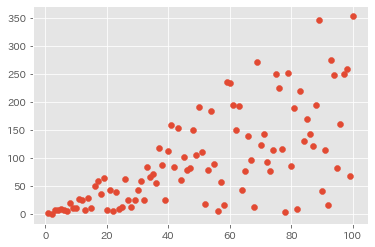

In [22]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

# 入力値の生成
np.random.seed(2)

x = np.arange(1,101)
y = 4 * x * np.random.rand(100)

# 散布図の描画
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x,y)
plt.show()

### 散布図を活用する

In [24]:
anime_master_csv = 'anime/anime_master.csv'
df = pd.read_csv(anime_master_csv, index_col='anime_id')
df.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


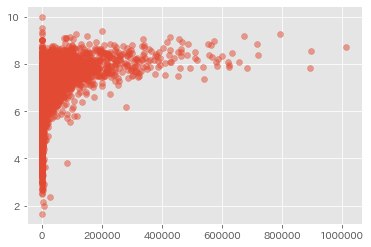

In [25]:
# membersとratingの値で散布図を作成

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(df['members'], df['rating'], alpha=0.5)
plt.show()

In [26]:
# メンバ数80万人以上の作品
df.loc[df['members'] >= 800000, ['name', 'members']]

,name,members
anime_id,,
1535,Death Note,1013917
16498,Shingeki no Kyojin,896229
11757,Sword Art Online,893100


In [29]:
# メンバ数60万人以上かつレーティング8.5以上のデータ
df.loc[(df['members'] >= 600000) & (df['rating'] >= 8.5), ['name', 'rating']]

,name,rating
anime_id,,
5114,Fullmetal Alchemist: Brotherhood,9.26
9253,Steins;Gate,9.17
1575,Code Geass: Hangyaku no Lelouch,8.83
1535,Death Note,8.71
16498,Shingeki no Kyojin,8.54


### グループ化された散布図を作成する

In [30]:
# typeの重複のないリスト
types = df['type'].unique()
types

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

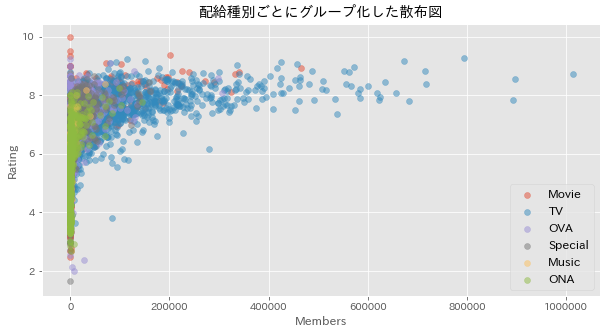

In [33]:
# 配給種別ごとにグループ化されたデータの散布図の作成
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

for t in types:
    x = df.loc[df['type'] ==t , 'members']
    y = df.loc[df['type'] ==t , 'rating']
    
    ax.scatter(x, y, alpha=0.5, label=t)
    
ax.set_title('配給種別ごとにグループ化した散布図')
ax.set_xlabel('Members')
ax.set_ylabel('Rating')

ax.legend(loc='lower right', fontsize=12)
plt.show()

## 4-5 棒グラフ
- Axes.bar()メソッドを使用して描画

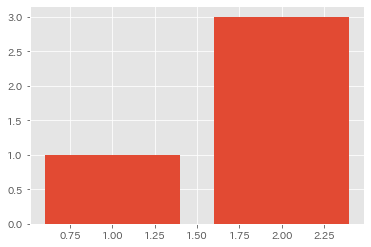

In [34]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
fig = plt.figure()
ax = fig.add_subplot(111)

x = [1,2]
y = [1,3]

ax.bar(x,y)
plt.show()

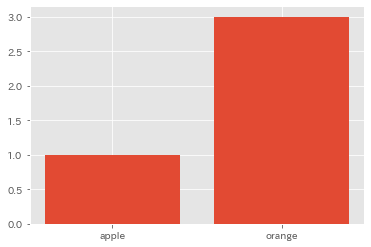

In [35]:
# 引数tick_labelに目盛りラベルを設定する

fig = plt.figure()
ax = fig.add_subplot(111)

labels = ['apple', 'orange']
ax.bar(x, y, tick_label= labels)

plt.show()

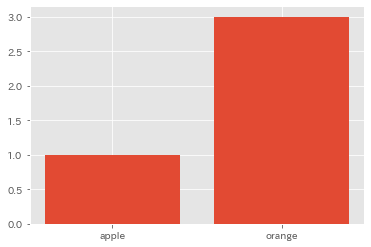

In [36]:
# 描画後に文字列ラベルを追加
fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(x, y)

# X軸の軸目盛りと軸目盛りラベル
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.show()


#### 横向きの棒グラフを作成する場合
- Axes.barh()メソッドを用いて描画する

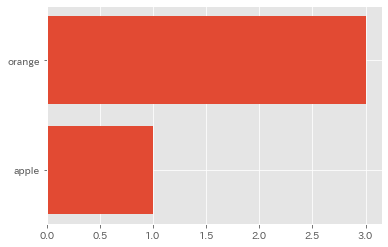

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.barh(x, y, tick_label=labels)

plt.show()

## 棒グラフを活用する

In [38]:
anime_master_csv = 'anime/anime_master.csv'
dfac = pd.read_csv(anime_master_csv)
dfac.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


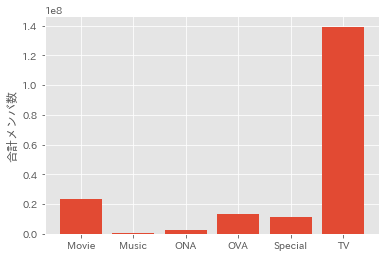

In [39]:
# 配給種別ごとの合計メンバ数の棒グラフを描画
fig = plt.figure()
ax = fig.add_subplot(111)

y = dfac.groupby('type').sum()['members']
x = range(len(y))

xlabel=y.index
ax.bar(x, y, tick_label=xlabel)
ax.set_ylabel('合計メンバ数')

plt.show()

## 複数グループの棒グラフを作成する

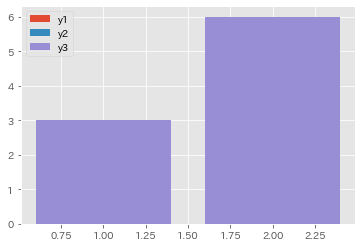

In [40]:
# 失敗例

# データセットの作成
x = [1,2]
y1, y2, y3 = [1,2], [2,4], [3,6]

# 複数グループの棒グラフの描画
fig = plt.figure()
ax = fig.add_subplot(111)

w = 0.2
ax.bar(x, y1, label= 'y1')
ax.bar(x, y2, label= 'y2')
ax.bar(x, y3, label= 'y3')

ax.legend()

plt.show()


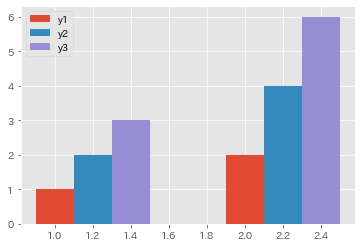

In [43]:
# 複数グループの棒グラフの描画
fig = plt.figure()
ax = fig.add_subplot(111)

w = 0.2
ax.bar(x, y1, width = w, label='y1')
ax.bar(np.array(x) + w, y2, width=w, label='y2')
ax.bar(np.array(x) + w *2, y3, width=w, label='y3')

ax.legend()
plt.show()
       

In [42]:
np.array(x) + 0.2

array([1.2, 2.2])

### 複数グループの棒グラフを活用する

In [45]:
anime_genre_top10_pivoted_csv = 'anime/anime_genre_top10_pivoted.csv'
dfag = pd.read_csv(anime_genre_top10_pivoted_csv, index_col='genre')

dfag

,Movie,Music,ONA,OVA,Special,TV
genre,,,,,,
Comedy,7293127.0,20860.0,1477266.0,5614758.0,6659293.0,65420862.0
Action,10224960.0,77054.0,524907.0,5793680.0,3412689.0,63364032.0
Drama,9034099.0,100734.0,188427.0,3043374.0,1915578.0,41011557.0
Romance,5245386.0,42811.0,411331.0,3143167.0,2015820.0,40703388.0
Supernatural,5452779.0,9189.0,192989.0,2696715.0,2336723.0,38956520.0
Fantasy,8019406.0,43962.0,188937.0,2754224.0,2504131.0,34932563.0
Shounen,5698808.0,NaN,97833.0,3861296.0,2591988.0,35532847.0
School,1512533.0,5496.0,523223.0,2417660.0,2661425.0,35489099.0
Adventure,9485223.0,42829.0,70431.0,2373765.0,2052024.0,27529975.0


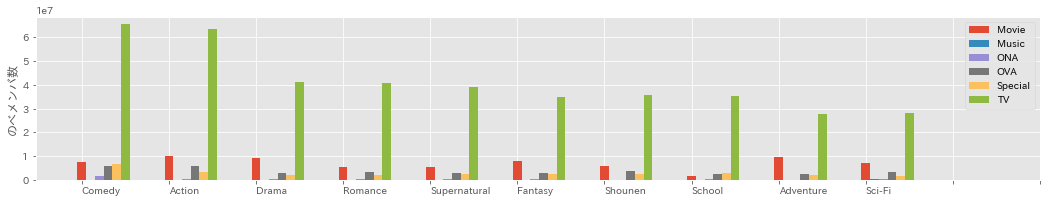

In [48]:
fig = plt.figure(figsize=(18, 3))
ax = fig.add_subplot(111)

wt = np.array(range(len(dfag)))
w = 0.1

for i in dfag.columns:
    ax.bar(wt, dfag[i], width=w, label=i)
    wt = wt + w
    
ax.set_xticks(np.array(range(len(dfag) +2)))
ax.set_xticklabels(dfag.index, ha='left')
ax.set_ylabel('のべメンバ数')
ax.legend()

plt.show()

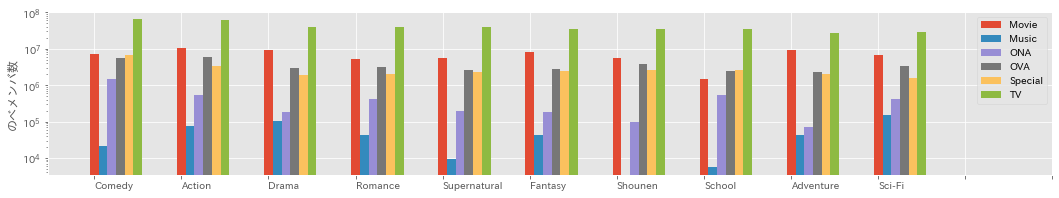

In [51]:
# 対数軸に変更
fig = plt.figure(figsize=(18, 3))
ax = fig.add_subplot(111)

wt = np.array(range(len(dfag)))
w = 0.1

for i in dfag.columns:
    ax.bar(wt, dfag[i], width=w, label=i)
    wt = wt + w
    
ax.set_xticks(np.array(range(len(dfag) + 2)))
ax.set_xticklabels(dfag.index, ha='left')
ax.set_ylabel('のべメンバ数')
ax.set_yscale('log')
ax.legend()

plt.show()

### 積み上げ棒グラフを作成する
1. y1とy2とy3の和を描画する
2. 1にy1とy2の和を重ねて描画する
3. 2にy1を重ねて描画する

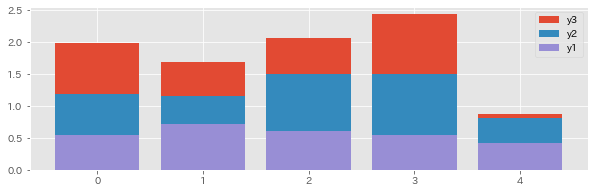

In [60]:
# データセットの作成
x = np.arange(5)
np.random.seed(0)
y = np.random.rand(15).reshape((3,5))

y1, y2, y3 = y

y1b = np.array(y1)
y2b = y1b + np.array(y2)
y3b = y2b + np.array(y3)

# 積み上げ棒グラフの描画
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)

ax.bar(x, y3b, label='y3')
ax.bar(x, y2b, label='y2')
ax.bar(x, y1b, label='y1')

ax.legend()

plt.show()

### 積み上げ棒グラフを活用する

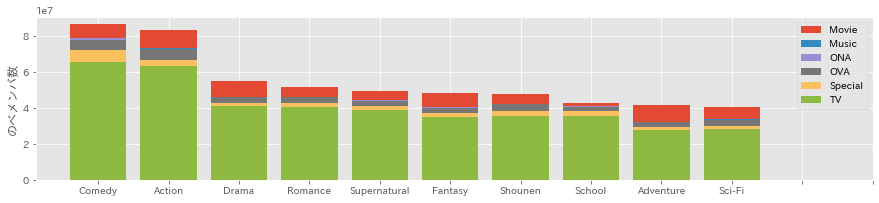

In [63]:
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(111)

rows, cols = len(dfag), len(dfag.columns)
x = range(rows)

for i, t in enumerate(dfag.columns):
    # i列目から最終列までの和を計算
    y = dfag.iloc[:,i:cols].sum(axis=1)
    
    ax.bar(x,y, label=t)
    
ax.set_xticks(range(rows + 2))
ax.set_xticklabels(dfag.index)
ax.set_ylabel('のべメンバ数')
ax.legend()

plt.show()

## 4-6 ヒストグラム
- ヒストグラムはAxes.hist()で作成する

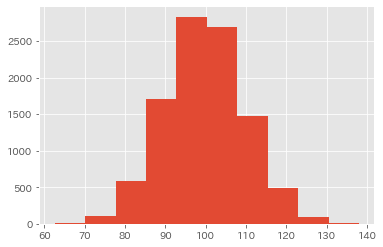

In [67]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#データセット
mu = 100 #平均値
sigma = 10 # 標準偏差
np.random.seed(0)

x = np.random.normal(mu, sigma, 10000)

# ヒストグラムの描画
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(x)

plt.show()

#### ビンの幅と数を変更する場合
- 引数のrwidthでビンの幅、binsでビンの本数を指定

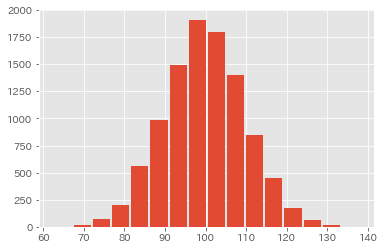

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(x, rwidth=0.9, bins=16)

plt.show()

### ヒストグラムを活用する

In [70]:
amime_mater_csv ='anime/anime_master_csv'
df = pd.read_csv(anime_master_csv, index_col='anime_id')
df.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


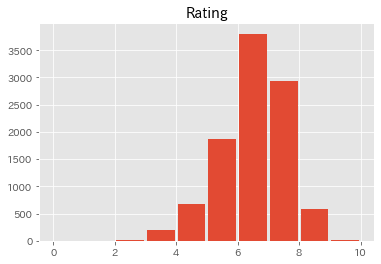

In [72]:
# レーティングの可視化
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(df['rating'], range=(0,10), rwidth=0.9)
ax.set_title('Rating')

plt.show()

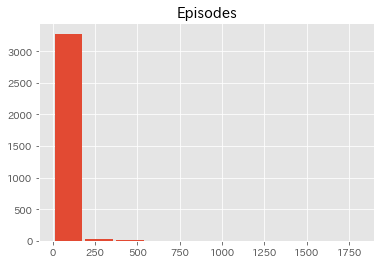

In [73]:
# エピソード数の可視化
fig = plt.figure()
ax = fig.add_subplot(111)

df_tv = df[df['type'] == 'TV']

ax.hist(df_tv['episodes'], rwidth=0.9)
ax.set_title('Episodes')

plt.show()

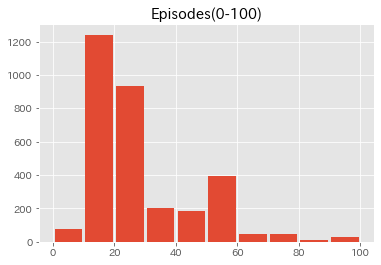

In [74]:
# ヒストグラムの範囲を指定
fig = plt.figure()
ax = fig.add_subplot(111)

# rangeの値を(0,100)に指定する
ax.hist(df_tv['episodes'], rwidth=0.9, range=(0, 100))
ax.set_title("Episodes(0-100)")

plt.show()

#### 横向きのヒストグラム

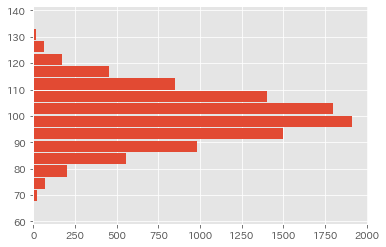

In [75]:
# 引数orientationにhorizontailとする
np.random.seed(0)
x = np.random.normal(100, 10, 10000)

fig = plt.figure()
ax = fig.add_subplot(111)

# orientationをhorizontalに設定
ax.hist(x, rwidth=0.9, bins=16, orientation='horizontal')

plt.show()

### 相対度数のヒストグラム
- データ数が異なるグループのヒストグラムを比較する場合、相対度数を用いてヒストグラム化する
- 相対度数のヒストグラムは相対度数の合計が１になる

C:\Users\mikam\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


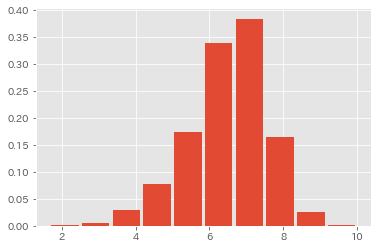

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111)

# normedをTrueに指定
ax.hist(df['rating'], normed=True, rwidth=0.9)

plt.show()

### 累積ヒストグラム（累積度数図）
- 累積ヒストグラムを描画する場合は引数cumulativeをTrue

C:\Users\mikam\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


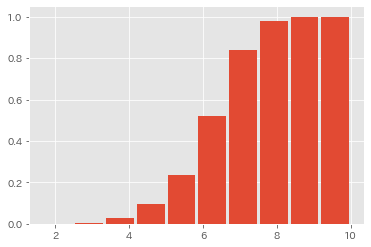

In [77]:
fig = plt.figure()
ax = fig.add_subplot(111)

# cumulativeをTrueに指定
ax.hist(df['rating'], normed=True, cumulative=True, rwidth=0.9)

plt.show()

### 階級幅の設定
- binsオプションにリスト型の数列を与えると階級幅を指定できる

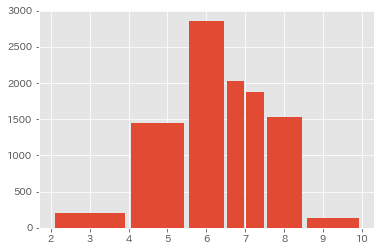

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(df['rating'], bins=[2,4, 5.5, 6.5, 7, 7.5, 8.5, 10], rwidth=0.9)

plt.show()

### 近似曲線の追加
- 近似曲線はヒストグラムを描画したのち、折れ線グラフを描画
1. df['rating']データセットの平均値と標準偏差を得る
2. numpy.linespaceで各ビンの区切りの値（ビンの上限値と下限値）を得る
3. 得られた平均値、標準偏差、区切り値から正規分布の」確率密度関数によりY値を算出する
4. 得られたX値とY値とで近似曲線を描画する

C:\Users\mikam\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


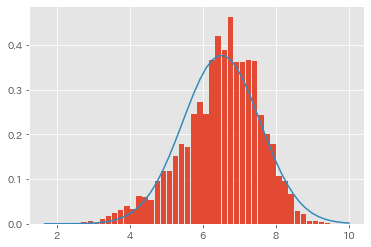

In [80]:
# ビン数
bins = 50
# データの最小値
dfmin = np.min(df['rating'])
# データ数の最大値
dfmax = np.max(df['rating'])

# ヒストグラムの描画
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(df['rating'], bins=bins, range=(dfmin, dfmax), normed=True, rwidth=0.9)

# 平均と標準偏差
mu, sigma = df['rating'].mean(), df['rating'].std()

# X値
x = np.linspace(dfmin, dfmax, bins) # ビンの区切りの値

# 近似的な確率密度関数を使用してY値を生成
y = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x-mu)**2 / (2* sigma **2))

#近似曲線の描画
ax.plot(x,y)

plt.show()


### 複数グループを重ねて描画
- 同じサブプロットにヒストグラムを繰り返し描画することで複数グループを重ねて書ける

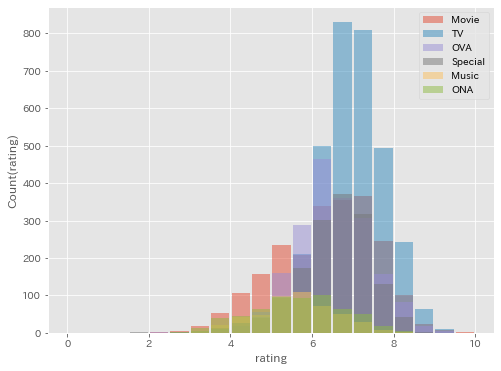

In [83]:
types = df['type'].unique()
labels = types.tolist()

fig =plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

b_num = np.arange(0, 10.5, 0.5)

for t in types:
    ax.hist(df.loc[df['type'] == t, 'rating'],
           bins= b_num,
           rwidth=0.9,
           alpha= 0.5,
           label= t)
    
ax.legend()
ax.set_xlabel('rating')
ax.set_ylabel('Count(rating)')

plt.show()

### 複数グループを並べて描画
- 入れ子のリストを作成してから描画すると複数グループを横に並べたヒストグラム

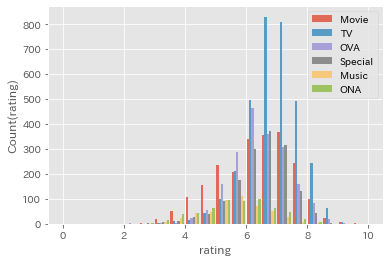

In [85]:

# データセットの作成
dataset = [df.loc[df['type'] == t, 'rating'] for t in types]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(dataset, bins=np.arange(0, 10.5, 0.5),
       rwidth=0.9,
       alpha= 0.8,
       label= labels)

ax.legend()
ax.set_xlabel('rating')
ax.set_ylabel('Count(rating)')

plt.show()

### 複数のグループを積み上げて描画
- リストのデータセットを作成し、引数stackedにTrueとする

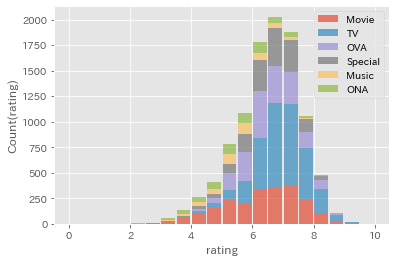

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(dataset,
       bins= np.arange(0, 10.5, 0.5),
       rwidth=0.9,
       alpha=0.7,
       label=labels,
       stacked=True)

ax.legend()
ax.set_xlabel('rating')
ax.set_ylabel('Count(rating)')

plt.show()

## 4-7 箱ひげ図

- 箱ひげ図はAxes.boxplot()メソッドで作成
- 1次元のデータを与えると箱ひげ図が1つ出力

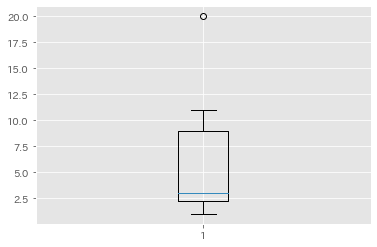

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

x = [1, 2, 3, 3, 11, 20]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(x)

plt.show()

### 複数の箱ひげ図を描画する場合

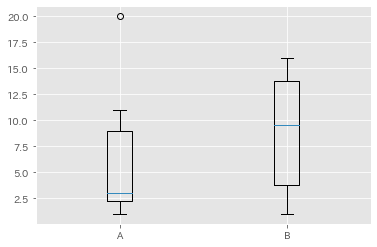

In [90]:
x = [[1,2,3,3,11,20], [1,2,9,10,15,16]]
labels = ['A', 'B']

fig = plt.figure()
ax = fig.add_subplot(111)

# データとラベルを指定
ax.boxplot(x, labels=labels)

plt.show()

### 箱ひげ図を活用する

In [31]:


anime_master_csv ='anime/anime_master.csv'
df = pd.read_csv(anime_master_csv, index_col='anime_id', engine = 'python')
df.head(3)

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintamaﾂｰ,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262


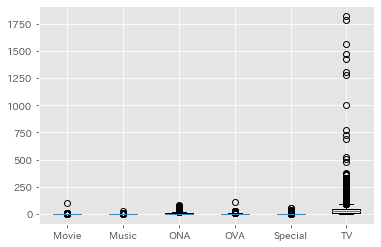

In [32]:
# 配給種別ごとのエピソード数を可視化
labels =[]
types_list = []

# 配給種別ごとのエピソード数の情報をリスト化
for label, df_per_type in df.groupby('type'):
    labels.append(label)
    types_list.append(df_per_type['episodes'].tolist())
    
fig = plt.figure()
ax = fig.add_subplot(111)

ax.boxplot(types_list, labels = labels)
plt.show()

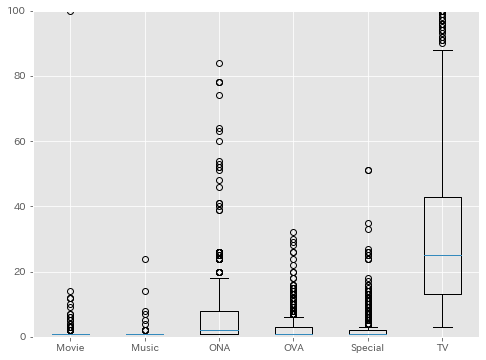

In [33]:
# 描画範囲を限定した箱ひげ図

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.boxplot(types_list, labels=labels)

# Y軸の描画範囲を0から100までに限定
ax.set_ylim(0, 100)

plt.show()

In [34]:
# 四分位点の値をdescribe()で確認
df['episodes'][df['type'] == 'TV'].describe().round(1)

count    3330.0
mean       37.5
std        83.3
min         3.0
25%        13.0
50%        25.0
75%        43.0
max      1818.0
Name: episodes, dtype: float64

### 箱ひげ図の書式を一括設定する
- 書式は各要素の書式を辞書形式で与える事で一括設定できる

In [35]:
# ①データセットを作る

np.random.seed(3)
dataset = [np.random.normal(20 + mu, 5, 1000) for mu in range(1,5)]

In [36]:
# ②書式の辞書を作る

# 外れ値の書式辞書
flierprop = {'color': '#EC407A',
            'marker': 'o',
            'markerfacecolor': '#2196F3',
            'markeredgecolor': 'white',
            'markersize': 5,
            'linestyle' : 'None',
            'linewidth' : 0.1}

# 箱の書式辞書
boxprop = {'color': '#2196F3',
          'facecolor' : '#BBDEFB',
          'linewidth': 1,
          'linestyle': '-'}

# ヒゲの書式辞書
whiskerprop = {'color': '#2196F3',
              'linewidth': 1,
              'linestyle': '--'}

# ヒゲ末端キャップの書式辞書
capprop = {'color': '#2196F3',
          'linewidth': 1,
          'linestyle': ':'}

# 中央値の書式辞書
medianprop = {'color': '#2196F3',
             'linewidth': 2,
             'linestyle': '-'}

# 平均値の書式辞書
meanprop = {'color': '^',
           'markerfacecolor': '#2196F3',
           'markeredgecolor': 'white',
           'markersize': 10,
           'linewidth': 1,
           'linestyle': ''}

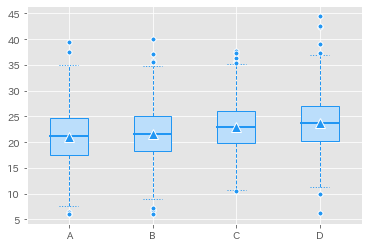

In [37]:
# ③描画する

fig = plt.figure()
ax = fig.add_subplot(111)

ax.boxplot(dataset,
          patch_artist='Patch',         # 書式を設定する場合はPatchを選択
          labels = ['A','B','C', 'D'],  # 項目ラベル
          showmeans = True,             #平均値の描画
          flierprops = flierprop,       # 外れ値の書式設定 
          boxprops = boxprop,           # 箱の書式設定
          whiskerprops = whiskerprop,   #ヒゲの書式設定
          capprops = capprop,           # ヒゲ末端キャップの書式設定
          medianprops = medianprop,     # 中央値の書式設定 
          meanprops = meanprop          # 平均値の書式設定 
          )

plt.show()

### ボックスごとに書式を設定する
1. 図を描画する
2. boxの要素数と同じ要素数の色セット(カラ-セット)を作成する
3. 上側と下側に分かれている要素の書式設定用に数列のリストnを作成する
4. 箱と外れ値、中央値の書式設定をする
5. ヒゲとヒゲの末端キャップの書式を設定する
6. 平均値の書式を設定する

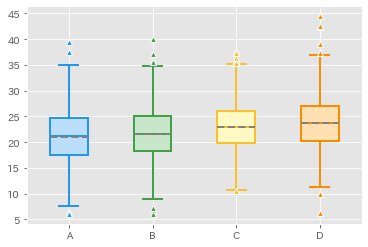

In [43]:
# 図の描画
fig = plt.figure()
ax = fig.add_subplot(111)

bp = ax.boxplot(dataset, patch_artist='Patch', labels=['A', 'B', 'C', 'D'],
               meanline=True, showmeans=True)

# カラーセット
colors1 = ['#2196F3', '#43A047', '#FBC02D', '#FB8C00']
colors2 = ['#BBDEFB', '#C8E6C9', '#FFF9C4', '#FFE0B2']
# 上下に分かれた要素に設定するため用の数列
n = [0,0,1,1,2,2,3,3]

# 書式設定
# 箱と外れ値、中央値の書式設定
for params in zip(bp['boxes'],
                 bp['fliers'],
                 bp['medians'],
                 colors1,
                 colors2):
    bpb, bpf, med, color1, color2 = params
    
    # 箱の書式設定
    bpb.set_color(color1)
    bpb.set_facecolor(color2)
    bpb.set_linewidth(2)
    
    # 外れ値の書式設定
    bpf.set(marker='^', color=color2)
    bpf.set_markeredgecolor('white')
    bpf.set_markerfacecolor(color1)
    
    # 中央値の書式設定
    med.set_color(color1)
    med.set_linewidth(2)
    
# ヒゲとヒゲの末端キャップの書式設定
for bpc, bpw, m in zip(bp['caps'], bp['whiskers'], n):
    bpc.set_color(colors1[m])
    bpc.set_linewidth(2)
    bpw.set_color(colors1[m])
    bpw.set_linewidth(2)
    
# 平均値の書式設定
for mean, color2 in zip(bp['means'], colors2):
    mean.set_color('grey')
    mean.set_linewidth(2)
    mean.set_linestyle('--')
    
plt.show()

## 4-8 円グラフ
- Axes.pie()で円グラフを作成
- 初期設定は度数法で0°（時計の3時の位置）から半時計回り要素を描画、中心座標は(0,0)、半径は1

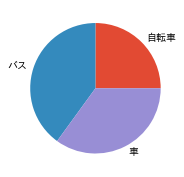

In [45]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

labels =['自転車', 'バス', '車']
sizes = [25, 40, 35]

fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)

# 円グラフの描画
ax.pie(sizes, labels=labels)

plt.show()

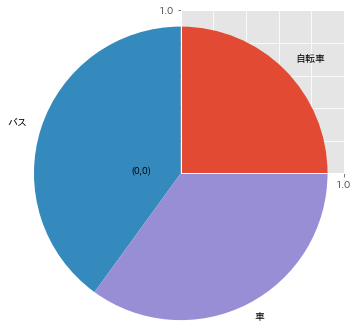

In [46]:
# 円グラフと軸の関係を描画
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)

ax.pie(sizes, labels= labels, radius=0.9, frame=True)
ax.text(-0.3, 0, '(0,0)', fontsize=9)

plt.show()

### 円グラフの書式設定

#### 円グラフに設定出来る書式
- explode: 各要素を切り離して表示、リストかタプルで指定、例:(0, 0, 0.5, 0) 
- labels: ラベルを表示、リストかタプルで指定
- colors: 各要素の色を設定、リストかタプルで指定
- autopct: 数値ラベルの書式設定、表示形式を文字列で指定
- pctdistance: 数値ラベルの位置を設定、数値型で指定、数値は各要素の中心からの距離
- shadow: 影の表示・非表示を真偽値で指定
- labeldistance: ラベルの位置を数値で指定
- startangle: 開始角度を数値型で指定
- radius: 半径を設定、数値型で指定(デフォルト1)
- counterclock: 表示順を真偽値で指定、True:半時計回り、False:時計回り
- widgeprops: 各要素の書式を辞書形式で指定
- textprops: テキストの書式を辞書形式で指定
- center: 円グラフの中心座標をタプル型で指定
- frame: 軸・枠線の有無を真偽値で指定

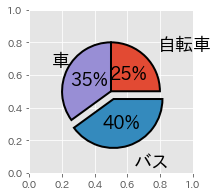

In [53]:
# 円グラフの書式設定
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)

# 扇形の書式設定辞書
wprops = {'edgecolor': 'black',
         'linewidth': 2}

# テキストの書式設定辞書
tprops = {'fontsize': 18}

ax.pie(sizes,
      explode=(0.,0.05, 0),
      labels = labels,
      autopct='%1.0f%%',
      pctdistance=0.5,
      shadow=False,
      labeldistance=1.35,
      startangle=90, 
      radius=0.3,
      counterclock=False,
      wedgeprops=wprops,
      textprops=tprops,
      center=(0.5,0.5),
      frame=True)

plt.show()

### 円グラフを活用する

In [56]:
anime_genre_top10_pivoted_csv = 'anime/anime_genre_top10_pivoted.csv'
df = pd.read_csv(anime_genre_top10_pivoted_csv, index_col='genre')
df

,Movie,Music,ONA,OVA,Special,TV
genre,,,,,,
Comedy,7293127.0,20860.0,1477266.0,5614758.0,6659293.0,65420862.0
Action,10224960.0,77054.0,524907.0,5793680.0,3412689.0,63364032.0
Drama,9034099.0,100734.0,188427.0,3043374.0,1915578.0,41011557.0
Romance,5245386.0,42811.0,411331.0,3143167.0,2015820.0,40703388.0
Supernatural,5452779.0,9189.0,192989.0,2696715.0,2336723.0,38956520.0
Fantasy,8019406.0,43962.0,188937.0,2754224.0,2504131.0,34932563.0
Shounen,5698808.0,NaN,97833.0,3861296.0,2591988.0,35532847.0
School,1512533.0,5496.0,523223.0,2417660.0,2661425.0,35489099.0
Adventure,9485223.0,42829.0,70431.0,2373765.0,2052024.0,27529975.0


- MovieとTVののべメンバ数内訳を円グラフにする
- 円グラフは90°の位置から時計回りに降順に並べる

In [57]:
# TV
df_tv = df.sort_values(by='TV', ascending=False)['TV']
# Movie
df_movie = df.sort_values(by='Movie', ascending=False)['Movie']

df_tv

genre
Comedy          65420862.0
Action          63364032.0
Drama           41011557.0
Romance         40703388.0
Supernatural    38956520.0
Shounen         35532847.0
School          35489099.0
Fantasy         34932563.0
Sci-Fi          28072322.0
Adventure       27529975.0
Name: TV, dtype: float64

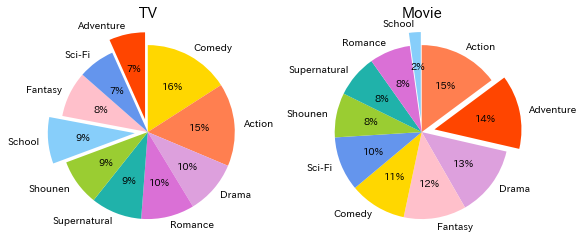

In [59]:
fig = plt.figure(figsize=(9,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# カラーセット
colors1 = ('gold', 'coral', 'plum', 'orchid', 'lightseagreen',
          'yellowgreen', 'lightskyblue', 'pink', 'cornflowerblue',
          'orangered')

colors2 = ('coral', 'orangered', 'plum', 'pink', 'gold',
          'cornflowerblue', 'yellowgreen', 'lightseagreen', 'orchid',
          'lightskyblue')

#TVの円グラフ
ax1.pie(df_tv,
       explode=(0, 0, 0, 0, 0, 0, 0.15, 0, 0, 0.15),
       labels=df_tv.index,
       autopct='%1.0f%%',
       colors=colors1,
       startangle=90,
       counterclock=False)

#Movieの円グラフ
ax2.pie(df_movie,
       explode=(0, 0.15, 0, 0, 0, 0, 0, 0, 0, 0.15),
       labels=df_movie.index,
       autopct='%1.0f%%',
       colors=colors2,
       startangle=90, counterclock=False)

ax1.set_title('TV')
ax2.set_title('Movie')

# サブプロット間のスペース調整

plt.show()